# Predicting Birth Weight: Classifying Maternal Health Data into Categories and Predicting Exact Birth Weight

This dataset is a comprehensive collection of maternal and neonatal health data designed to facilitate research in machine learning, healthcare, and nutrition. It comprises 1800 records, each representing a unique case with detailed clinical and socioeconomic information related to the mother and child. The primary focus of the dataset is to analyze and predict the birth weight of a child, either by classifying it into three categories or by predicting it as a continuous value.

## Dataset Features

The dataset includes 17 important clinical features of the mother and 1 socioeconomic feature, which are as follows:

1. **Age (years)**: The age of the mother in years.
2. **Height (cm)**: The height of the mother in centimeters.
3. **Bgroup**: The blood group of the mother.
4. **Parity**: The number of times the mother has given birth.
5. **ANC**: The number of antenatal care visits.
6. **Iwt (kg)**: The initial weight of the mother in kilograms.
7. **FWt (kg)**: The final weight of the mother in kilograms before delivery.
8. **IBP_sys**: Initial systolic blood pressure of the mother.
9. **IBP_dias**: Initial diastolic blood pressure of the mother.
10. **FBP_sys**: Final systolic blood pressure of the mother before delivery.
11. **FBP_dias**: Final diastolic blood pressure of the mother before delivery.
12. **IHb (gm%)**: Initial hemoglobin level of the mother in grams per deciliter.
13. **Fhb (gm%)**: Final hemoglobin level of the mother in grams per deciliter before delivery.
14. **BS (RBS)**: Random blood sugar level of the mother.
15. **Term/Preterm**: Indicates whether the baby was born at term or preterm.
16. **Sex**: The sex of the baby.
17. **BWt (kg)**: The birth weight of the baby in kilograms.
18. **SEC**: Socioeconomic status of the mother, which is the socioeconomic feature.

## Target Variables

The dataset provides two possible target variables:

1. **LNH**: This column contains the class labels for the birth weight of the baby, categorized into three classes:
   - **Low-weight**
   - **Normal-weight**
   - **Over-weight**
   
   This target is suitable for **classification** tasks where the goal is to predict which weight category the newborn falls into based on the features.

2. **Bwt (kg)**: The actual birth weight of the baby in kilograms.

   This target is appropriate for **regression** tasks where the goal is to predict the exact birth weight of the newborn using the maternal clinical and socioeconomic features.


- **Classification**: If you are interested in predicting whether a newborn falls into a low-weight, normal-weight, or over-weight category, you can use **LNH** as the target variable.
  
- **Regression**: If your focus is on predicting the precise birth weight, use **Bwt(kg)** as the target variable. This is particularly useful in studies related to nutritional status, risk assessment, and medical planning.




## 1. Problem Definition

- Classification Task: Predict the birth weight category (LNH).
- Regression Task: Predict the exact birth weight (Bwt(kg)).

## 2. Data Collection

In [1]:
import pandas as pd
# Load the dataset
df = pd.read_csv('Predicting Child Birth Weight from Maternal Features.csv')

## 3. Understand the Data

In [2]:
# Display basic information
print(df.head())
print(df.info())
print(df.describe())

   SEC  Age(years)  Height(cm)  Bgroup  Parity  ANC  Iwt(kg)  FWt(kg)  \
0  BPL        23.0       146.0  A(+ve)     1.0  4.0     34.0     42.0   
1  BPL        25.0       165.0     NIL     1.0  3.0     68.0     71.0   
2  BPL        24.0       155.0  B(+ve)     1.0  3.0     49.0     55.0   
3  BPL        19.0       154.0     NIL     1.0  2.0     49.0     50.0   
4  BPL        21.0       150.0     NIL     1.0  4.0     41.0     48.0   

   IBP_sys  IBP_dias  FBP_sys  FBP_dias  IHb(gm%)  FHb(gm%)  BS(RBS)  \
0    116.0      78.0    120.0      70.0      10.0      13.2     90.0   
1     96.0      70.0    110.0      72.0      10.4      11.0     96.0   
2     91.0      52.0    110.0      70.0      11.0      11.6    102.0   
3     90.0      52.0    100.0      60.0      10.0      10.6    103.0   
4    100.0      60.0    110.0      70.0       9.0      10.2     99.0   

  Term/Preterm Sex  BWt(kg)  LNH  
0            T   F      2.7  2.0  
1            T   M      2.9  2.0  
2            T   M     

## 4. Data Cleaning
- Handle missing values (imputation, removal).
- Correct data inconsistencies and errors.
- Remove duplicates.
- Convert data types if necessary.

In [3]:
import numpy as  np
# Replace 'NIL' values with NaN in the 'Bgroup' column
df['Bgroup'] = df['Bgroup'].replace('NIL', np.nan)

# Handle missing values
# For numerical features, fill missing values with the median
df.fillna(df.median(numeric_only=True), inplace=True)

# For categorical features, fill missing values with the mode (most frequent value)
df.fillna(df.mode().iloc[0], inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = df.drop(columns=['LNH', 'BWt(kg)'])
y_class = df['LNH']  # Classification target
y_reg = df['BWt(kg)']    # Regression target

# Categorical and numerical columns
categorical_features = ['Bgroup', 'Term/Preterm', 'Sex', 'SEC']
numerical_features = X.columns.difference(categorical_features)

# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)
df.to_csv('Optimised Predicting Child Birth Weight from Maternal Features.csv', index=False)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1792 entries, 0 to 1799
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEC           1792 non-null   object 
 1   Age(years)    1792 non-null   float64
 2   Height(cm)    1792 non-null   float64
 3   Bgroup        1792 non-null   object 
 4   Parity        1792 non-null   float64
 5   ANC           1792 non-null   float64
 6   Iwt(kg)       1792 non-null   float64
 7   FWt(kg)       1792 non-null   float64
 8   IBP_sys       1792 non-null   float64
 9   IBP_dias      1792 non-null   float64
 10  FBP_sys       1792 non-null   float64
 11  FBP_dias      1792 non-null   float64
 12  IHb(gm%)      1792 non-null   float64
 13  FHb(gm%)      1792 non-null   float64
 14  BS(RBS)       1792 non-null   float64
 15  Term/Preterm  1792 non-null   object 
 16  Sex           1792 non-null   object 
 17  BWt(kg)       1792 non-null   float64
 18  LNH           1792 non-null   flo

## 5. Data Analysis and Visualization

### 1. Count Plots
Used to visualize the frequency of each category in a categorical variable.

### 2. Bar Chart
Displays rectangular bars with lengths proportional to the values they represent. Useful for comparing categories.

### 3. Distribution Plots
Visualizes the distribution of a continuous variable, often using a smoothed curve.

### 4. Histograms
Divides the data into bins and displays the frequency of values in each bin as bars.

### 5. Line Chart
Displays data points connected by straight line segments. Useful for visualizing trends over time.

### 6. Pie Chart
Represents the proportional sizes of different categories as slices of a circle.

### 7. Scatter Plot
Displays data points as individual dots, allowing you to visualize the relationship between two continuous variables.

### 8. Box Plot
Displays the distribution of a variable using the median, quartiles, and outliers. Useful for comparing distributions across categories.

### 9. Violin Plot
Combines a box plot with a rotated kernel density plot on each side. Provides a more detailed view of the distribution.

### 10. Joint Plot
Combines a scatter plot with a histogram or distribution plot for each variable. Useful for visualizing the relationship and distribution simultaneously.

### 11. Pair Plot
Creates a grid of scatter plots and histograms, showing the pairwise relationships between variables.

### 12. Correlation Matrix Heatmap
Visualizes the correlation between variables using a color-coded grid. Helps identify strong relationships between variables.



C:\Users\durup_d9ntfgd\AppData\Local\Temp\ipykernel_21736\4272905906.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='LNH', palette='Set2')  # Use a color palette


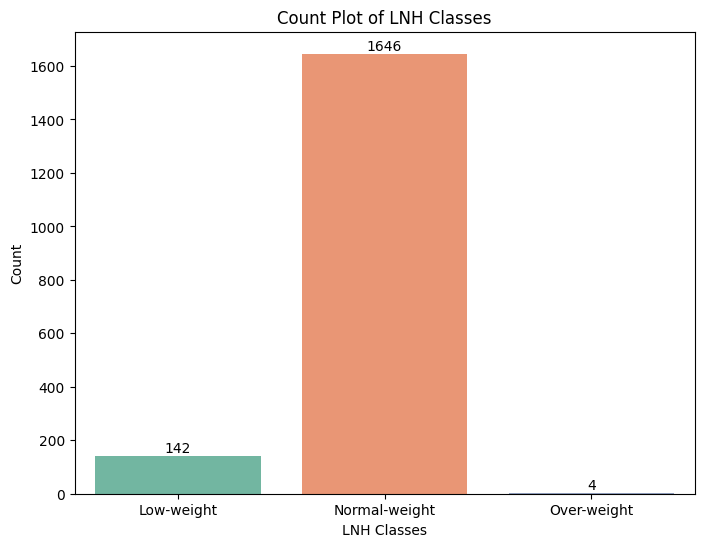

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Count Plot of LNH Classes
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='LNH', palette='Set2')  # Use a color palette
plt.title('Count Plot of LNH Classes')
plt.xlabel('LNH Classes')
plt.ylabel('Count')

# Customize x-axis labels
custom_labels = ['Low-weight', 'Normal-weight', 'Over-weight']
ax.set_xticks(range(len(custom_labels)))  # Set tick positions
ax.set_xticklabels(custom_labels, rotation=0, ha='center')  # Set tick labels

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Save the figure
plt.savefig('Count_Plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


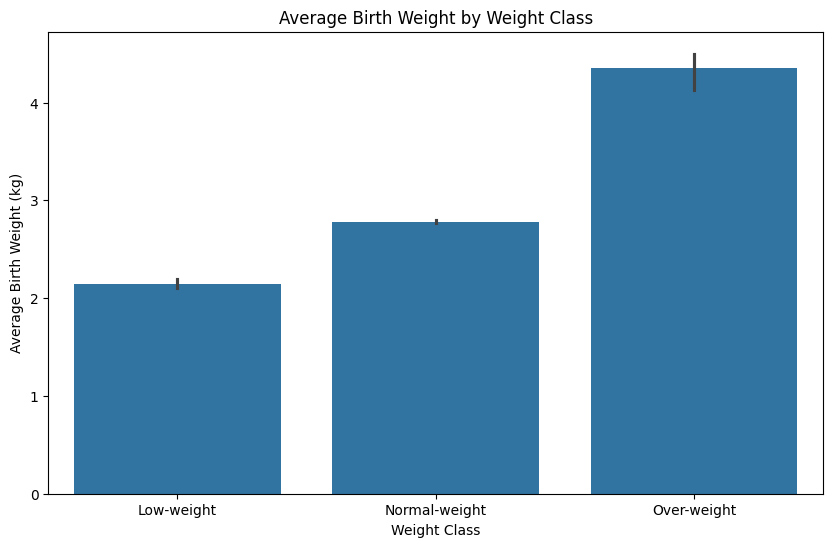

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Bar chart of average birth weight by weight class
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='LNH', y='BWt(kg)', data=df, estimator='mean')
plt.title('Average Birth Weight by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Average Birth Weight (kg)')

# Customize x-axis labels
custom_labels = ['Low-weight', 'Normal-weight', 'Over-weight']
ax.set_xticks(range(len(custom_labels)))  # Set tick positions
ax.set_xticklabels(custom_labels, rotation=0, ha='center')

# Save the figure
plt.savefig('Bar_Chart.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


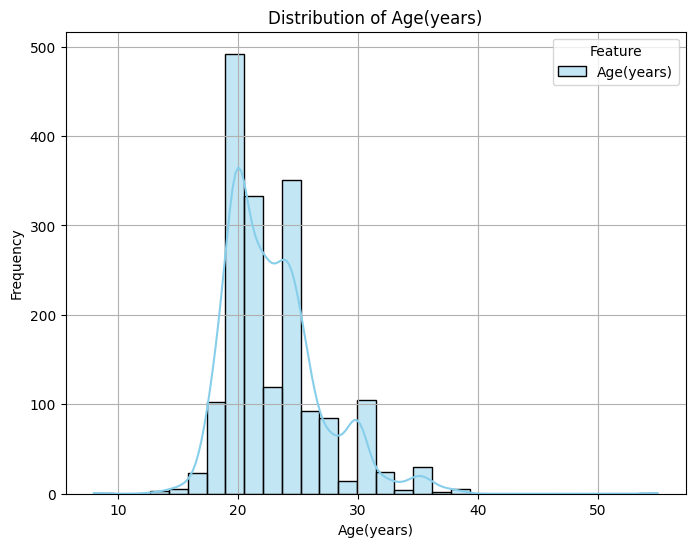

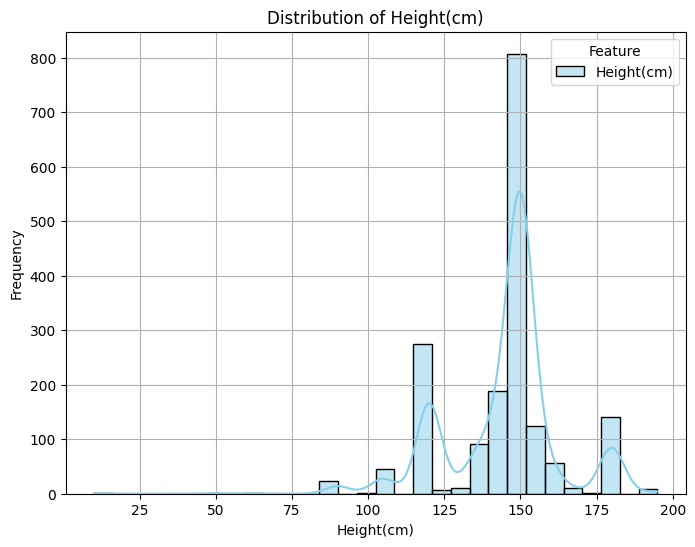

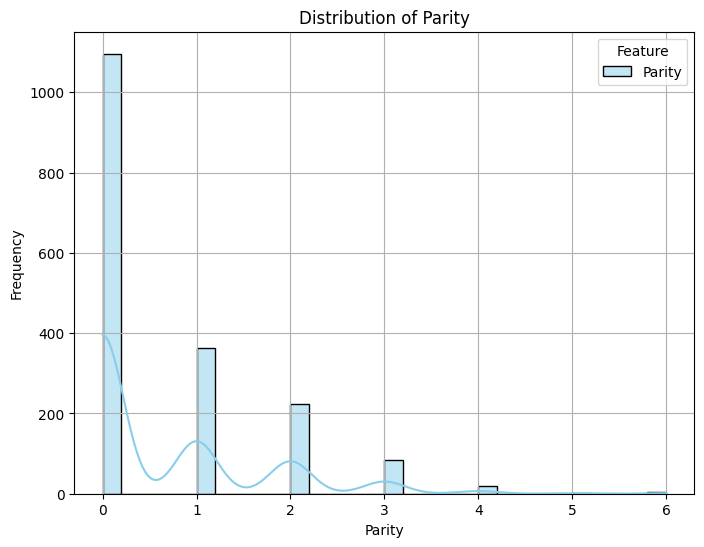

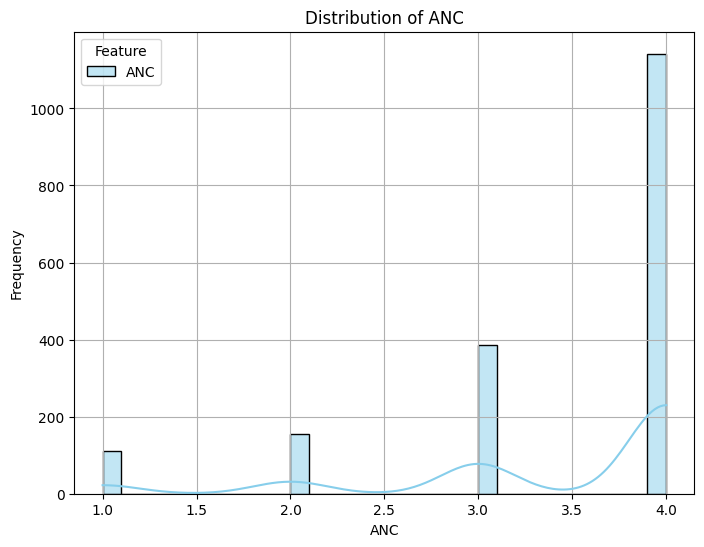

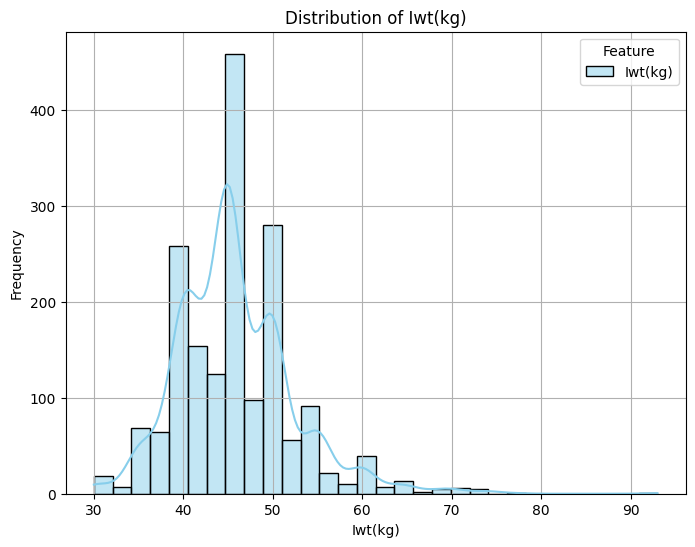

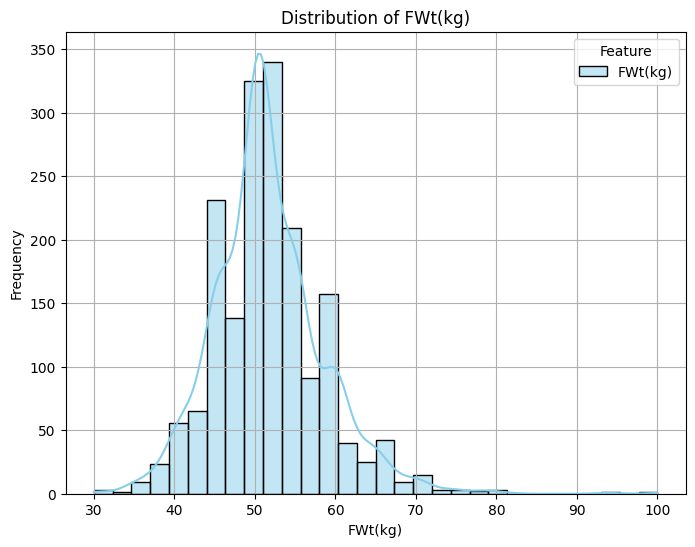

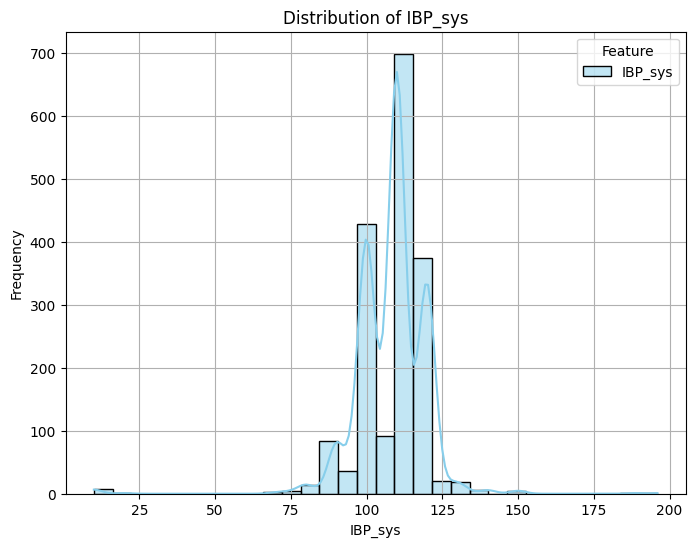

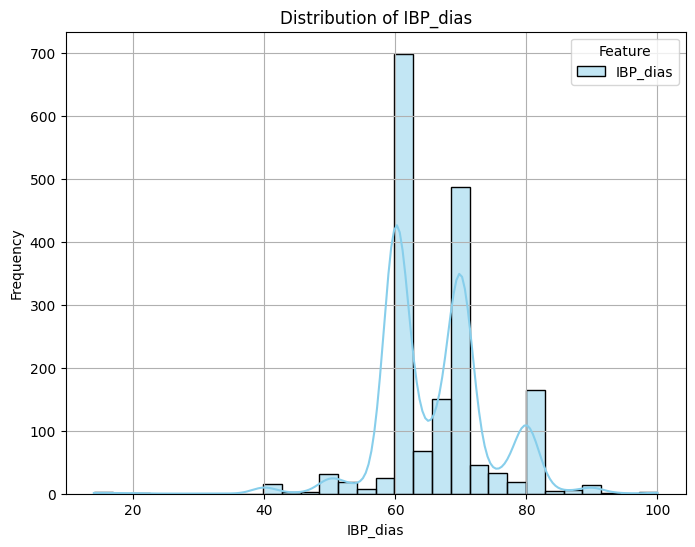

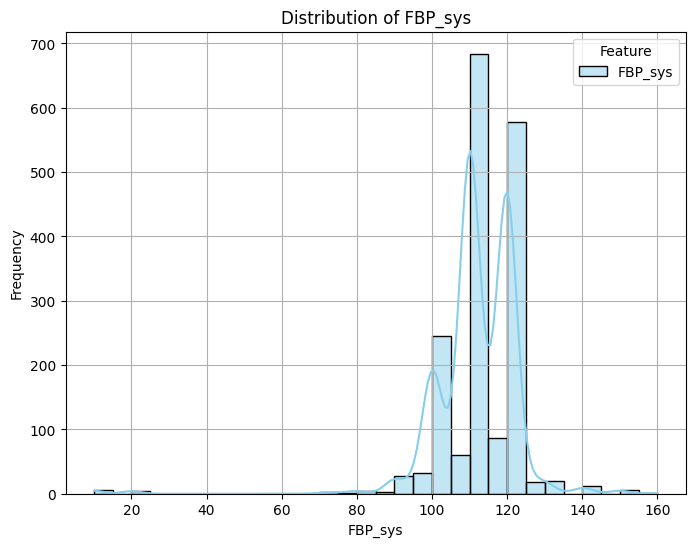

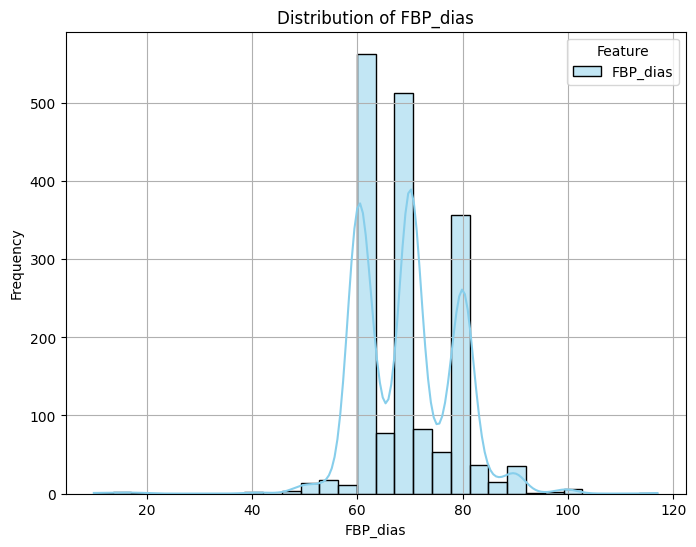

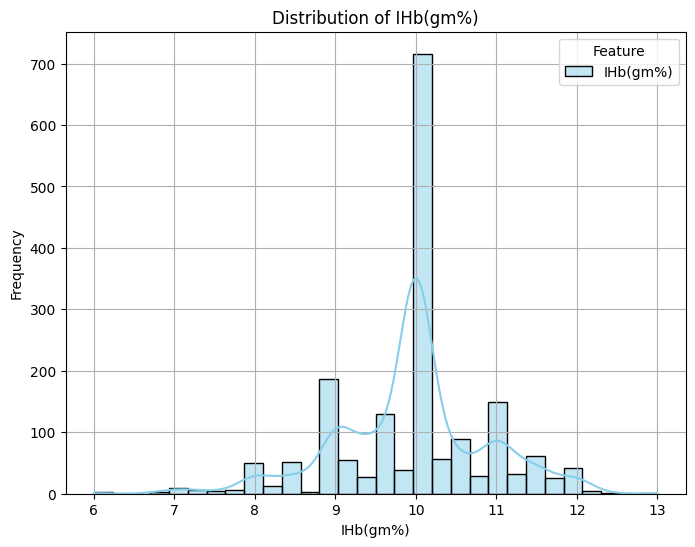

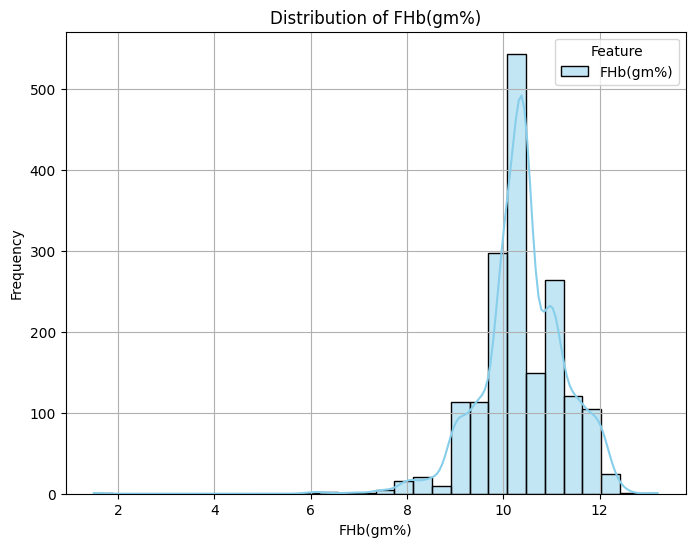

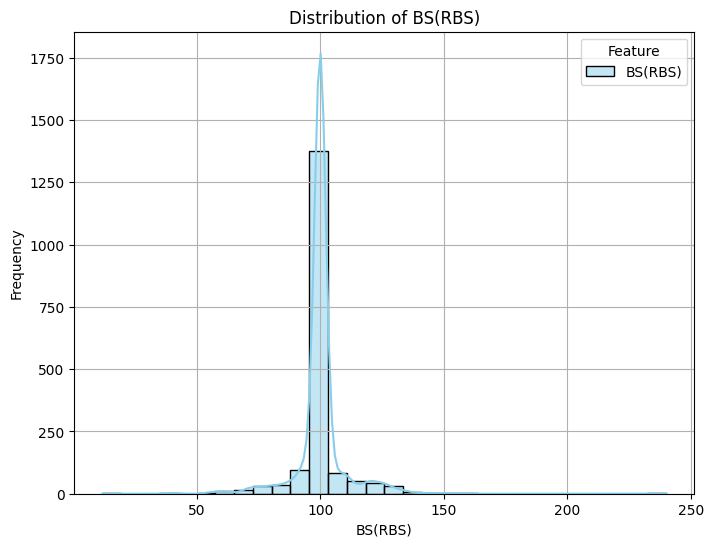

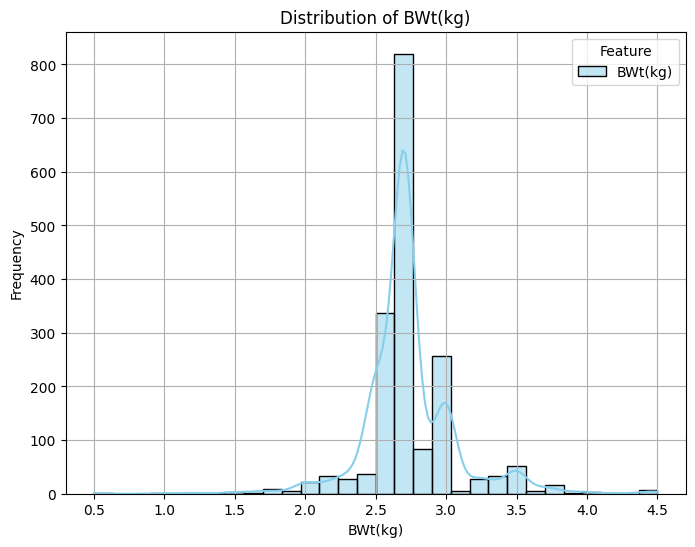

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 
            'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 
            'BS(RBS)', 'BWt(kg)']

for idx, feature in enumerate(features):
    if feature in df.columns:  # Check if feature is in the DataFrame
        plt.figure(figsize=(8, 6))
        # Plot histogram
        sns.histplot(df[feature], bins=30, kde=True, color='skyblue', label=feature)
        
        # Add legend manually if you have multiple categories
        plt.legend(title='Feature')
        
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        plt.grid(True)
        
        # Save the figure with the feature name in the filename
        filename = f'Distribution_Graph_{feature.replace("/", "-").replace("(", "").replace(")", "")}.jpg'
        plt.savefig(filename, format='jpg', dpi=300)
        
        plt.show()
    else:
        print(f"Column '{feature}' not found in DataFrame.")


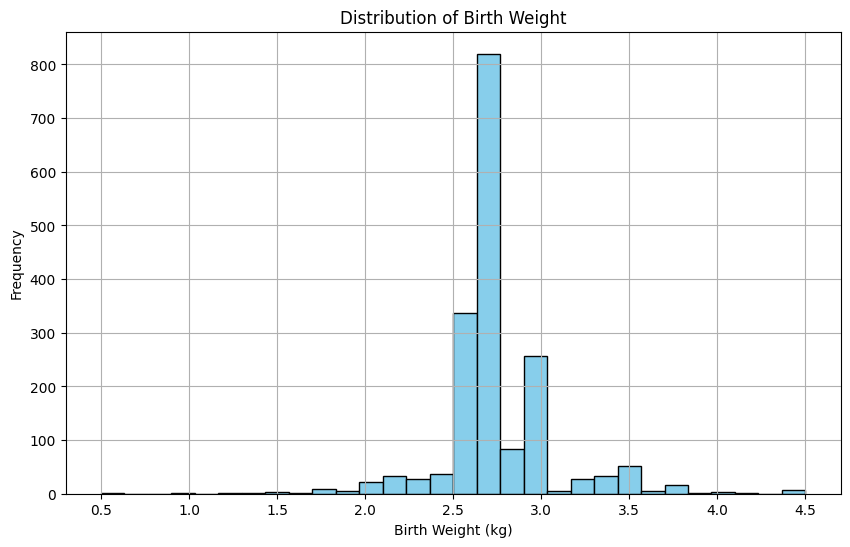

In [9]:
import matplotlib.pyplot as plt

# Histogram of birth weight
plt.figure(figsize=(10, 6))
df['BWt(kg)'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Birth Weight')
plt.xlabel('Birth Weight (kg)')
plt.ylabel('Frequency')

# Save the figure as a JPG file
plt.savefig('Histogram.jpg', format='jpg', dpi=300)

# Display the plot
plt.show()


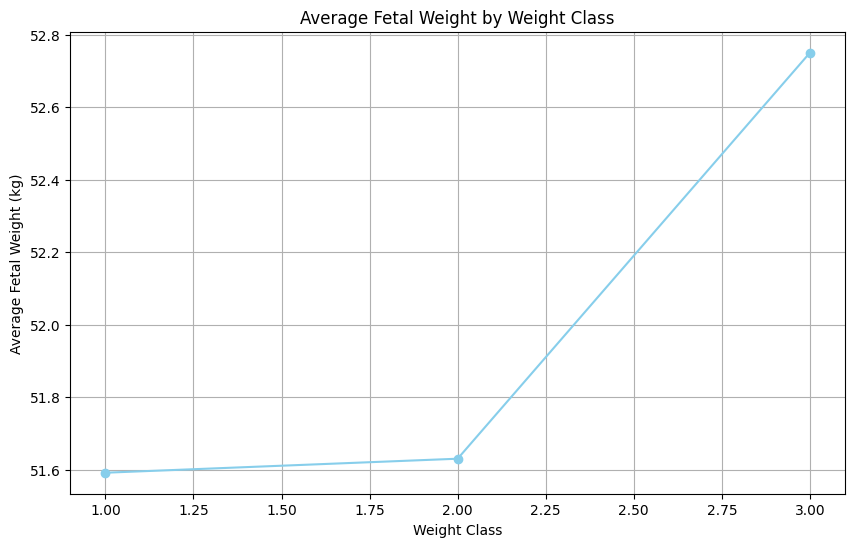

In [10]:
import matplotlib.pyplot as plt

# Example: Plotting a line chart of average birth weight by weight class
plt.figure(figsize=(10, 6))
df.groupby('LNH')['FWt(kg)'].mean().plot(kind='line', marker='o', color='skyblue')
plt.title('Average Fetal Weight by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Average Fetal Weight (kg)')
plt.grid(True)

# Save the figure as a JPG file
plt.savefig('Line_Plot.jpg', format='jpg', dpi=300)

# Display the plot
plt.show()


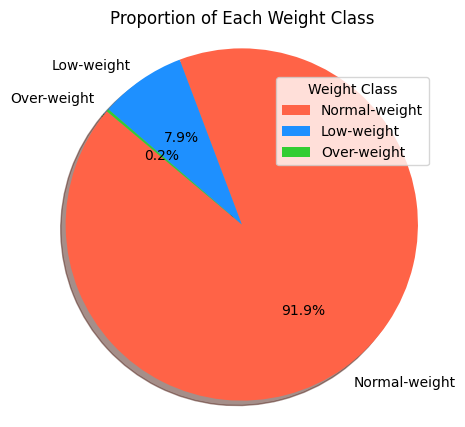

In [11]:
import matplotlib.pyplot as plt

# Replace numerical codes with descriptive labels if needed
df['LNH'] = df['LNH'].replace({1: 'Low-weight', 2: 'Normal-weight', 3: 'Over-weight'})

# Calculate the counts of each weight class
counts = df['LNH'].value_counts()

# Define colors for the pie chart
colors = ['#FF6347', '#1E90FF', '#32CD32']  # Tomato Red, Dodger Blue, Lime Green

# Plot the pie chart with descriptive labels
plt.figure(figsize=(5, 5))
plt.pie(counts, autopct='%1.1f%%', startangle=140, labels=counts.index, colors=colors, shadow=True)

# Add a legend
plt.legend(title='Weight Class', loc='upper right', bbox_to_anchor=(1, 0.9))

# Add title and other details
plt.title('Proportion of Each Weight Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Save the figure as a JPG file
plt.savefig('Pie_Chart.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


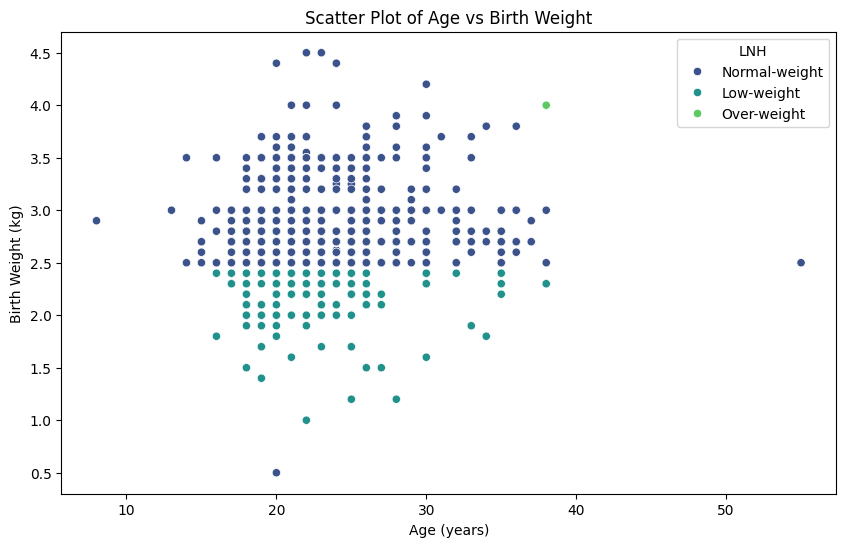

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace numerical codes with descriptive labels
df['LNH'] = df['LNH'].replace({1: 'Low-weight', 2: 'Normal-weight', 3: 'Over-weight'})

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age(years)', y='BWt(kg)', data=df, hue='LNH', palette='viridis')

# Add titles and labels
plt.title('Scatter Plot of Age vs Birth Weight')
plt.xlabel('Age (years)')
plt.ylabel('Birth Weight (kg)')

# Save the figure as a JPG file
plt.savefig('Scatter_Plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


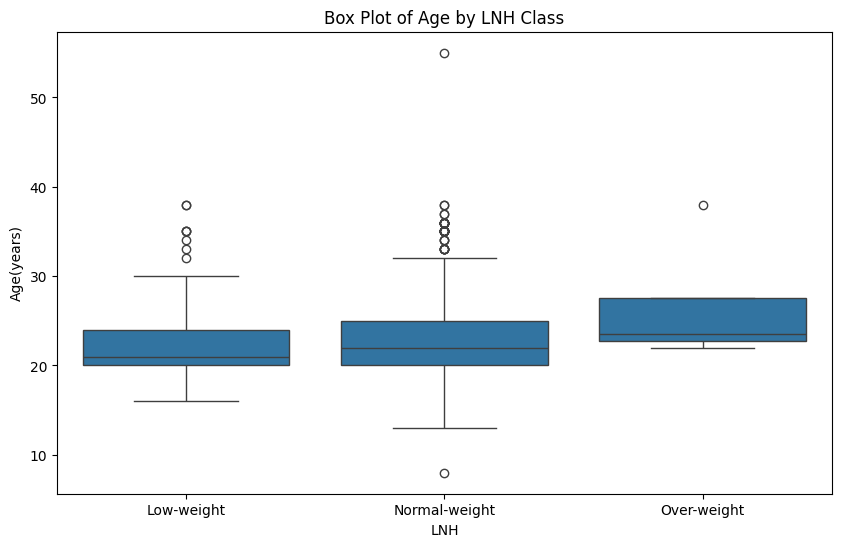

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box Plot (example: Age by LNH class)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='LNH', y='Age(years)', order=['Low-weight', 'Normal-weight', 'Over-weight'])
plt.title('Box Plot of Age by LNH Class')

# Save the figure as a JPG file
plt.savefig('Box_Plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


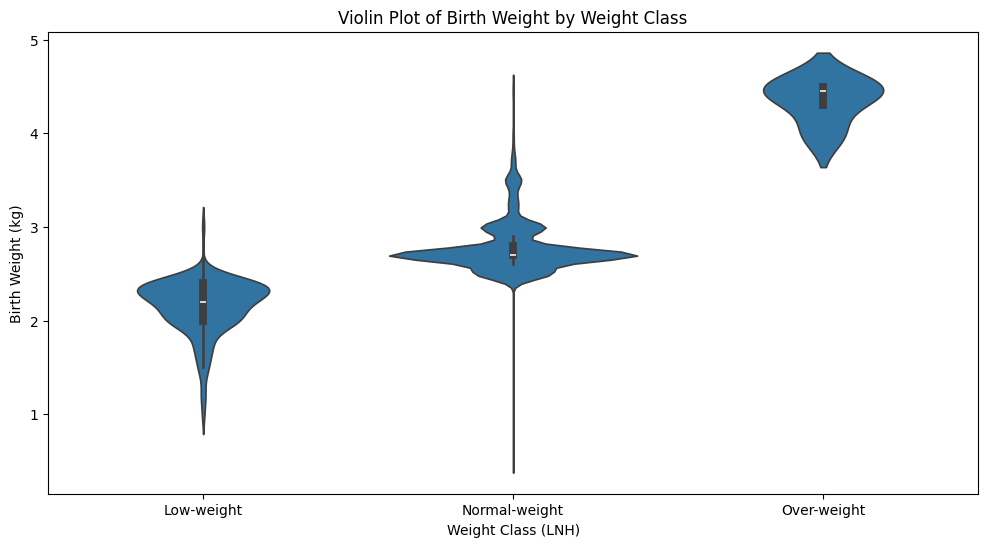

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Create the violin plot with specified order
sns.violinplot(x='LNH', y='BWt(kg)', data=df, order=['Low-weight', 'Normal-weight', 'Over-weight'])

# Add titles and labels
plt.title('Violin Plot of Birth Weight by Weight Class')
plt.xlabel('Weight Class (LNH)')
plt.ylabel('Birth Weight (kg)')

# Save the figure as a JPG file
plt.savefig('Violin_Plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


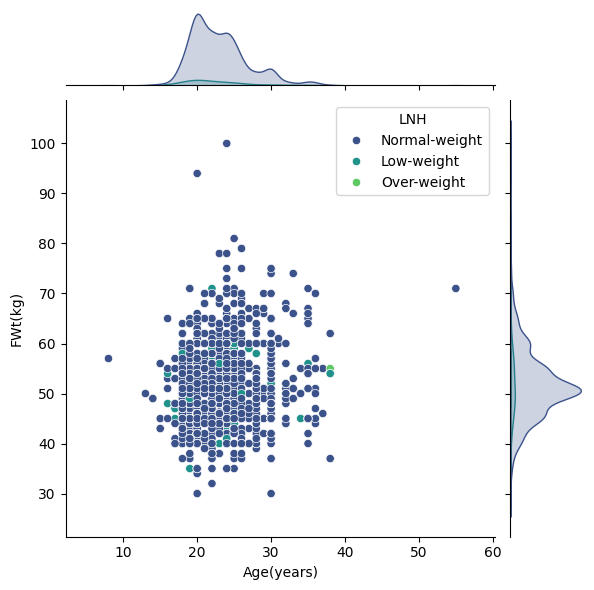

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the joint plot
g = sns.jointplot(x='Age(years)', y='FWt(kg)', data=df, kind='scatter', hue='LNH', palette='viridis')

# Save the figure as a JPG file
g.fig.savefig('Joint_Plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


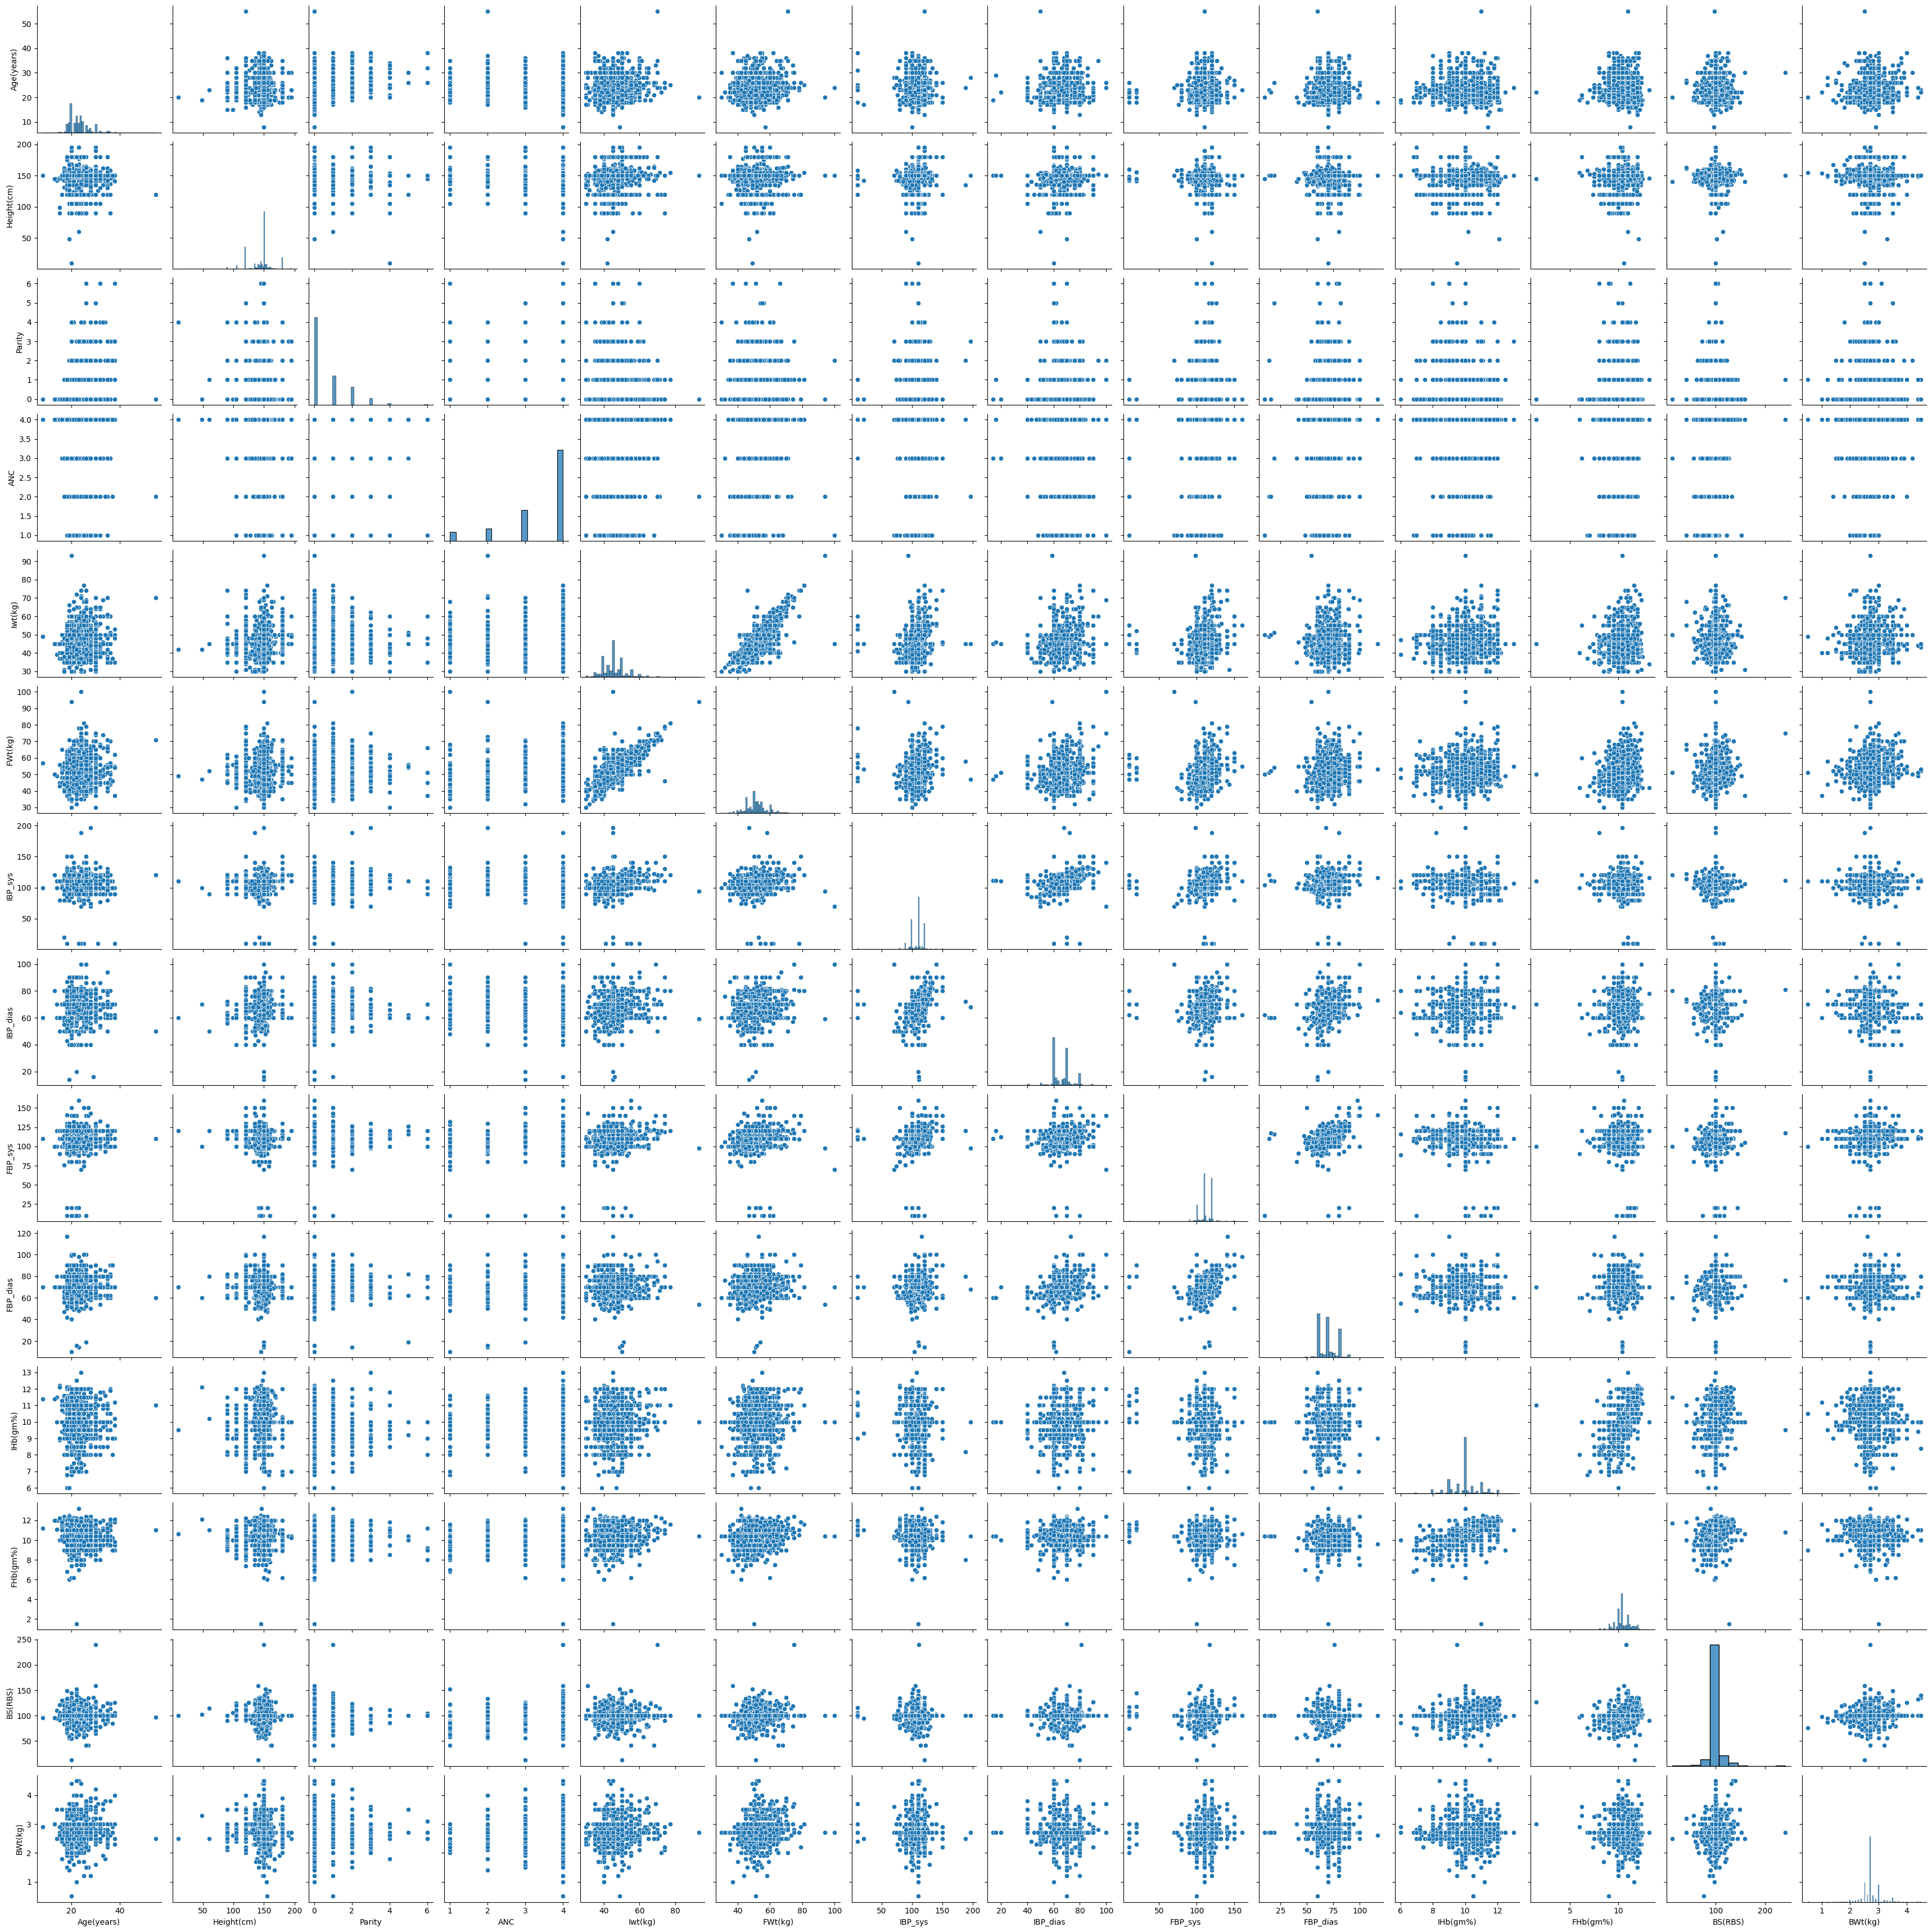

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of features to include in the pairplot
features = ['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 
            'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 
            'BS(RBS)', 'BWt(kg)']

# Create the pairplot
g = sns.pairplot(df[features])

# Save the figure as a JPG file
g.fig.savefig('Pair_Plot.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


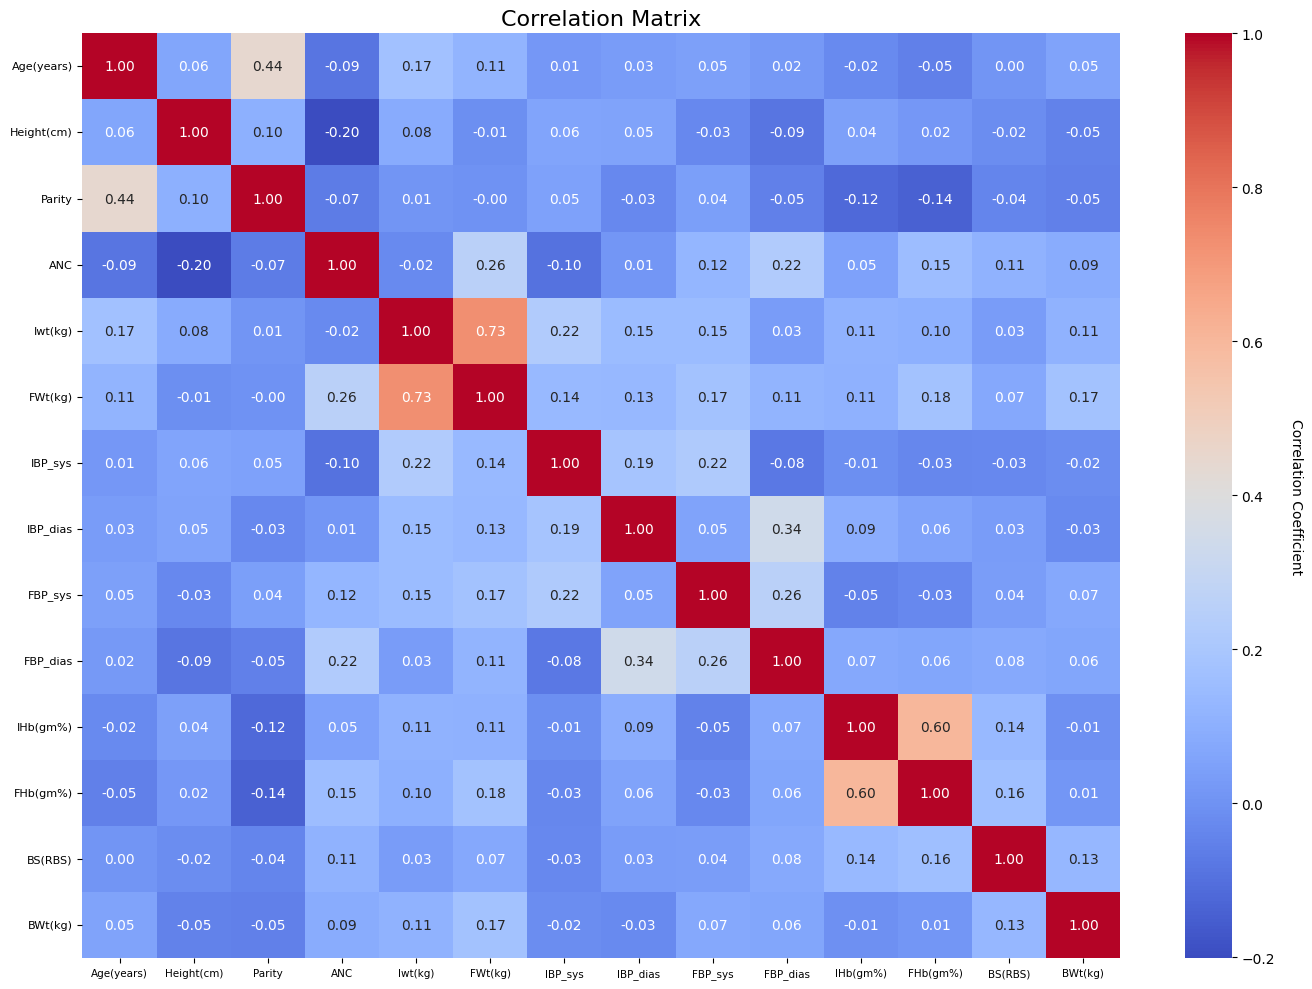

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df[['Age(years)', 'Height(cm)', 'Parity', 'ANC', 'Iwt(kg)', 'FWt(kg)', 
                  'IBP_sys', 'IBP_dias', 'FBP_sys', 'FBP_dias', 'IHb(gm%)', 'FHb(gm%)', 
                  'BS(RBS)', 'BWt(kg)']].corr()

# Create the heatmap
plt.figure(figsize=(14, 10))  # Adjust the figure size
ax = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})

# Add and customize the color bar (legend)
colorbar = ax.collections[0].colorbar
colorbar.set_label('Correlation Coefficient', rotation=270, labelpad=20)
colorbar.ax.tick_params(labelsize=10)  # Set the font size of color bar ticks

# Add title and adjust labels
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=0, fontsize=7.5)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=8)

# Adjust layout to fit everything nicely
plt.tight_layout()

# Save the figure as a JPG file
plt.savefig('HeatMap_Correlation_Matrix.jpg', format='jpg', dpi=300)

# Show the plot
plt.show()


## 6.  Feature Selection and Dimensionality Reduction

1. **Random Forest Feature Importance**
2. **Principal Component Analysis (PCA)**
3. **Recursive Feature Elimination (RFE)**

### 1. Random Forest Feature Importance

Random Forest can be used to evaluate the importance of features in predicting the target variable. The importance is determined by how much each feature contributes to improving the model's accuracy.

#### Feature Importance Table (Random Forest Feature)

| Feature       | Importance |
|---------------|------------|
| BWt(kg)       | 0.527518   |
| BS(RBS)       | 0.132339   |
| FHb(gm%)      | 0.050469   |
| FWt(kg)       | 0.046118   |
| IHb(gm%)      | 0.044547   |
| Age(years)    | 0.034722   |
| Height(cm)    | 0.033887   |
| Iwt(kg)       | 0.024510   |
| IBP_sys       | 0.017090   |
| Term/Preterm  | 0.016210   |
| Sex           | 0.014692   |
| Parity        | 0.012865   |
| IBP_dias      | 0.012259   |
| FBP_dias      | 0.012070   |
| FBP_sys       | 0.011137   |
| ANC           | 0.003939   |
| Bgroup        | 0.003928   |
| SEC           | 0.001701   |

### 2. Principal Component Analysis (PCA)

PCA is used to reduce the dimensionality of the dataset while preserving as much variance as possible. This technique helps in visualizing and reducing the number of features.

### Principal Components

PCA does not directly provide feature names but rather principal components (PCs) that are linear combinations of the original features. The principal components with the highest variance are selected.

#### Feature Importance Table (PCA Features)

| Feature       | Importance |
|---------------|------------|
| Iwt(kg)       | 0.156866   |
| ANC           | 0.126360   |
| IHb(gm%)      | 0.123281   |
| Bgroup        | 0.075599   |
| Age(years)    | 0.067675   |
| FWt(kg)       | 0.065931   |
| Height(cm)    | 0.059720   |
| FBP_dias      | 0.055771   |
| SEC           | 0.049252   |
| IBP_dias      | 0.047121   |
| Parity        | 0.046565   |
| FHb(gm%)      | 0.044669   |
| IBP_sys       | 0.040995   |
| FBP_sys       | 0.040197   |

### 3. Recursive Feature Elimination (RFE)

RFE is a feature selection technique that recursively removes the least important features to identify the most significant ones.

#### Feature Importance Table (RFE Features)

| Feature       | Importance |
|---------------|------------|
| Iwt(kg)       | 0.188263   |
| Bgroup        | 0.154054   |
| IHb(gm%)      | 0.146795   |
| ANC           | 0.134478   |
| FWt(kg)       | 0.105302   |
| Height(cm)    | 0.096814   |
| Age(years)    | 0.089868   |
| FHb(gm%)      | 0.084425   |



Classification Report:
               precision    recall  f1-score   support

   Low-weight       1.00      1.00      1.00        30
Normal-weight       1.00      1.00      1.00       329

     accuracy                           1.00       359
    macro avg       1.00      1.00      1.00       359
 weighted avg       1.00      1.00      1.00       359



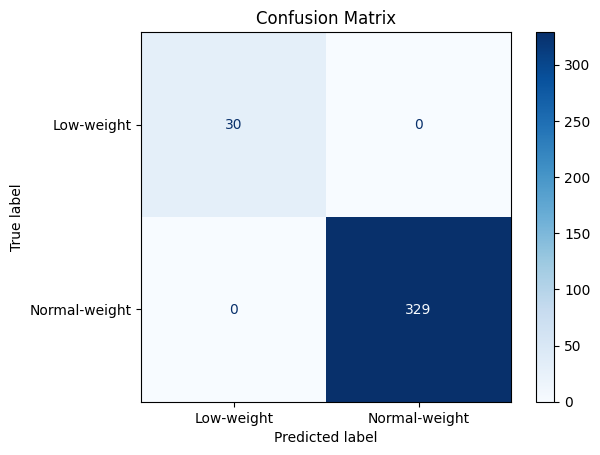


Feature Importance Table:
         Feature  Importance
17       BWt(kg)    0.527518
14       BS(RBS)    0.132339
13      FHb(gm%)    0.050469
7        FWt(kg)    0.046118
12      IHb(gm%)    0.044547
1     Age(years)    0.034722
2     Height(cm)    0.033887
6        Iwt(kg)    0.024510
8        IBP_sys    0.017090
15  Term/Preterm    0.016210
16           Sex    0.014692
4         Parity    0.012865
9       IBP_dias    0.012259
11      FBP_dias    0.012070
10       FBP_sys    0.011137
5            ANC    0.003939
3         Bgroup    0.003928
0            SEC    0.001701


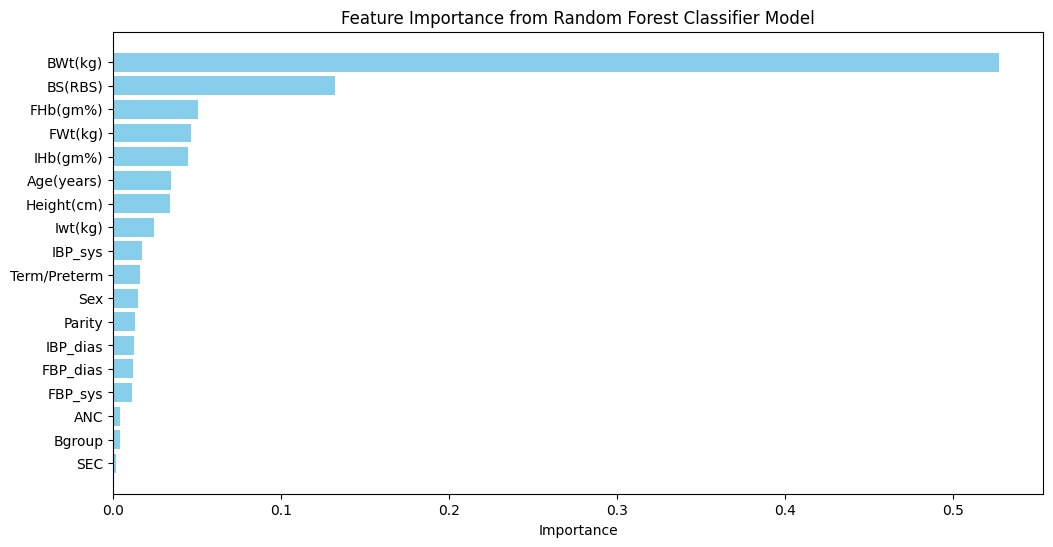

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def remove_highly_correlated_features(df, threshold=0.7):
    """
    Remove features from the DataFrame that are highly correlated with others.
    """
    numeric_df = df.select_dtypes(include=[np.number])
    corr_matrix = numeric_df.corr().abs()
    to_drop = set()

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i, j] >= threshold:
                colname = corr_matrix.columns[i]
                to_drop.add(colname)

    return df.drop(columns=to_drop)

def preprocess_data(df, target_column):
    """
    Preprocess data by label encoding categorical features.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame with features and target.
    target_column (str): The name of the target column.
    
    Returns:
    X_train, X_test, y_train, y_test: Split data for training and testing.
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    
    # Label encode categorical features
    label_encoders = {}
    for column in X.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        X[column] = le.fit_transform(X[column])
        label_encoders[column] = le
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, label_encoders

# Load the dataset
# df = pd.read_csv('your_data.csv') # Uncomment and replace with your actual data loading code

# Remove highly correlated features
df_reduced = remove_highly_correlated_features(df, threshold=0.75)

# Preprocess data
X_train, X_test, y_train, y_test, label_encoders = preprocess_data(df_reduced, target_column='LNH')

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_test)  # Extract unique class labels from the target variable
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)
conf_matrix_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix_Random_Forest_Model.jpg', format='jpg', dpi=300)
plt.show()

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance table
print("\nFeature Importance Table:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Classifier Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top

# Save feature importance plot
plt.savefig('Feature_Importance_Random_Forest_Model.jpg', format='jpg', dpi=300)
plt.show()


In [19]:
from sklearn.decomposition import PCA
# Apply PCA to reduce the number of features
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_pca = pca.fit_transform(X_preprocessed)

# Convert the PCA results back to a DataFrame with the same original feature names where possible
# If n_components < original number of features, only the first n_components columns are kept
pca_columns = X.columns[:pca.n_components_]

# Create a new DataFrame with the reduced dimensions
df_pca = pd.DataFrame(data=X_pca, columns=pca_columns)

# Optionally, add the target column back to the reduced DataFrame
df_pca['LNH'] = y_class.values

# Show the first few rows of the reduced feature set
print(df_pca.head())

# Optionally, you can save the reduced dataset to a CSV file
df_pca.to_csv('Reduced_Features_PCA.csv', index=False)



        SEC  Age(years)  Height(cm)    Bgroup    Parity       ANC   Iwt(kg)  \
0  0.272868   -1.597429   -0.143397  0.581798  2.086547  0.675396 -2.281133   
1  3.164113    1.712268   -1.512391 -0.150025 -1.129777 -2.069311  0.642538   
2  0.470813   -0.707602   -1.780628  1.115319 -0.937397  0.045995 -0.134512   
3 -1.388274   -0.530573   -1.859941 -0.055929 -1.287916 -0.299139  0.757662   
4 -1.208952   -0.373719    0.735639  0.460893 -0.490452 -0.013919  0.187682   

    FWt(kg)   IBP_sys  IBP_dias   FBP_sys  FBP_dias  IHb(gm%)  FHb(gm%)  LNH  
0  0.163479  1.353220  0.298867 -0.924983 -2.189582 -0.130548 -0.875942  2.0  
1  0.967831 -0.900354 -0.821517 -0.211457  0.075511 -0.377812 -0.206127  2.0  
2  1.183232 -1.174704 -0.529942  0.394157  0.088831 -0.550654 -0.316509  1.0  
3  0.707799 -0.960677 -1.254627  0.495352 -0.653823  0.981722 -0.249849  2.0  
4  0.897066  0.641914 -0.209305  0.294387 -0.689961  0.517889 -0.254074  1.0  


Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        30
         2.0       0.92      1.00      0.96       329

    accuracy                           0.92       359
   macro avg       0.46      0.50      0.48       359
weighted avg       0.84      0.92      0.88       359

Confusion Matrix:
[[  0  30]
 [  0 329]]


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

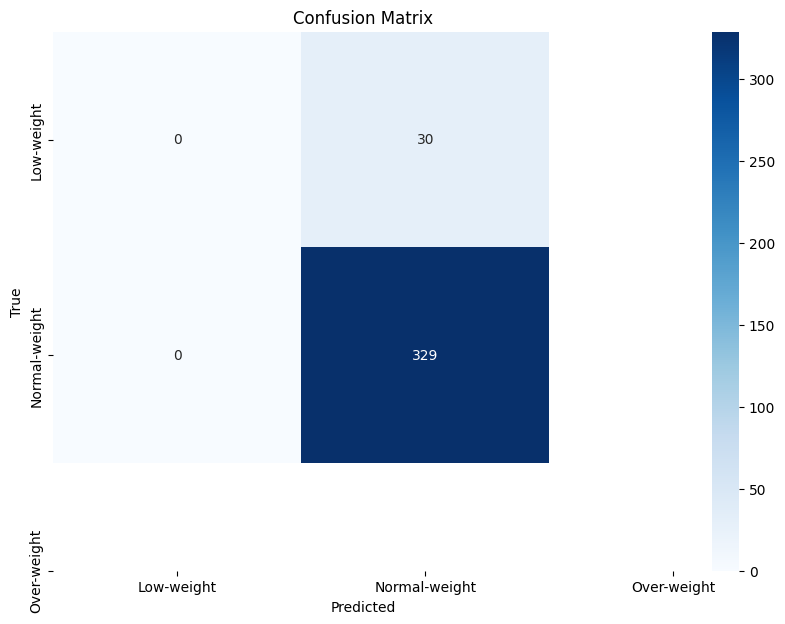


Feature Importance Table:
       Feature  Importance
6      Iwt(kg)    0.156866
5          ANC    0.126360
12    IHb(gm%)    0.123281
3       Bgroup    0.075599
1   Age(years)    0.067675
7      FWt(kg)    0.065931
2   Height(cm)    0.059720
11    FBP_dias    0.055771
0          SEC    0.049252
9     IBP_dias    0.047121
4       Parity    0.046565
13    FHb(gm%)    0.044669
8      IBP_sys    0.040995
10     FBP_sys    0.040197


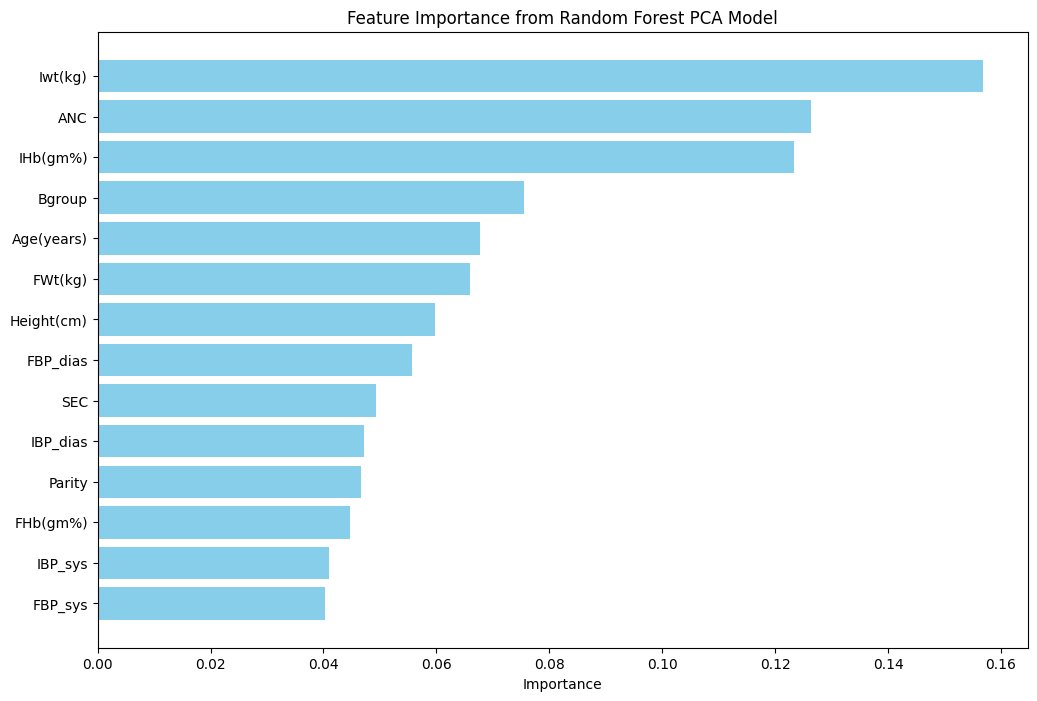

In [20]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA-reduced dataset
df_pca = pd.read_csv('Reduced_Features_PCA.csv')

# Prepare features and target variable
X_pca = df_pca.drop('LNH', axis=1)  # Features
y = df_pca['LNH']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low-weight', 'Normal-weight', 'Over-weight'],
            yticklabels=['Low-weight', 'Normal-weight', 'Over-weight'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Save the confusion matrix plot before showing it
plt.savefig('PCA_Confusion_Matrix.jpg', format='jpg', dpi=300)
plt.show()  # Now show the plot

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X_pca.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance Table:")
print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest PCA Model')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top

# Save feature importance plot before showing it
plt.savefig('Feature_Importance_PCA.jpg', format='jpg', dpi=300)
plt.show()  # Now show the plot after saving it

Selected Features: Index(['Age(years)', 'Height(cm)', 'Bgroup', 'ANC', 'Iwt(kg)', 'FWt(kg)',
       'IHb(gm%)', 'FHb(gm%)'],
      dtype='object')
Classification Report (RFE Features):
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        30
         2.0       0.92      1.00      0.96       329

    accuracy                           0.92       359
   macro avg       0.46      0.50      0.48       359
weighted avg       0.84      0.92      0.88       359

Confusion Matrix (RFE Features):
[[  0  30]
 [  0 329]]


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

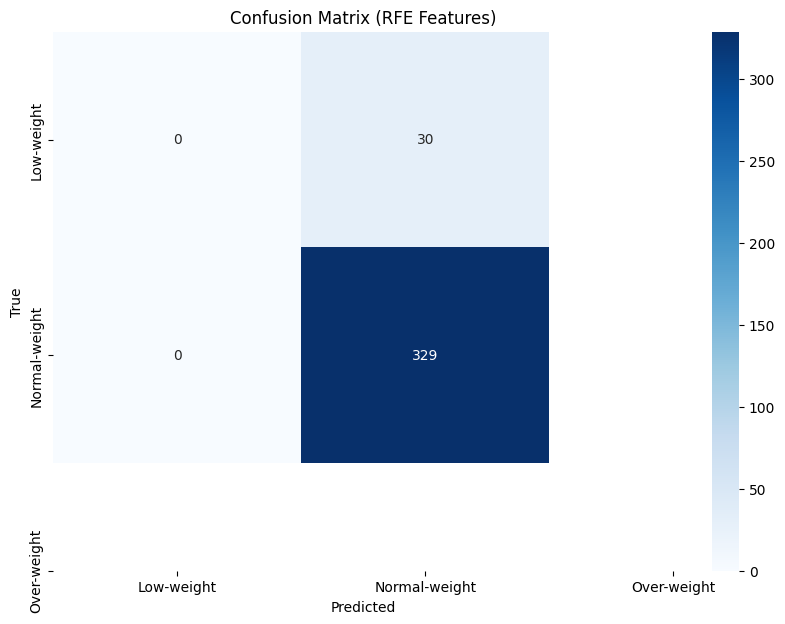


Feature Importance Table (RFE Features):
      Feature  Importance
4     Iwt(kg)    0.188263
2      Bgroup    0.154054
6    IHb(gm%)    0.146795
3         ANC    0.134478
5     FWt(kg)    0.105302
1  Height(cm)    0.096814
0  Age(years)    0.089868
7    FHb(gm%)    0.084425


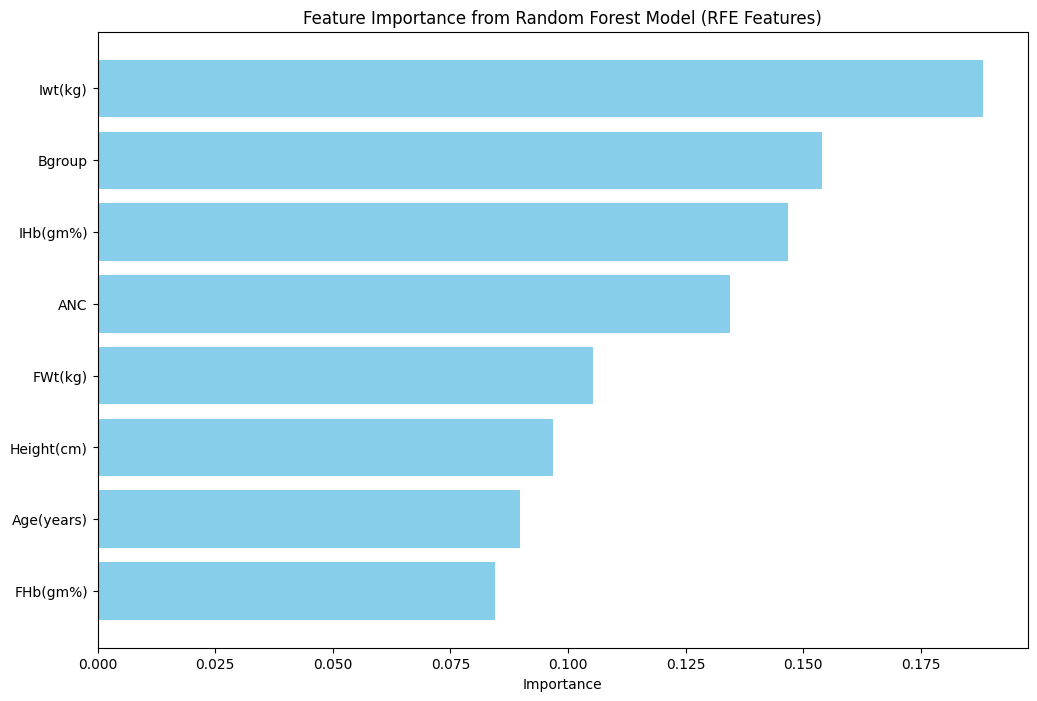

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the PCA-reduced dataset
df_pca = pd.read_csv('Reduced_Features_PCA.csv')

# Prepare features and target variable
X_pca = df_pca.drop('LNH', axis=1)  # Features
y = df_pca['LNH']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize RFE with Random Forest as the estimator
rfe = RFE(estimator=RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42), n_features_to_select=8)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the support and ranking of features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

# Reduce the dataset to only the selected features
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]

# Train a new Random Forest model on the RFE-reduced dataset
rf_model_rfe = RandomForestClassifier(n_jobs=-1, class_weight='balanced', random_state=42)
rf_model_rfe.fit(X_train_rfe, y_train)

# Make predictions with the RFE-reduced model
y_pred_rfe = rf_model_rfe.predict(X_test_rfe)

# Evaluate the RFE-reduced model
print("Classification Report (RFE Features):")
print(classification_report(y_test, y_pred_rfe))

print("Confusion Matrix (RFE Features):")
conf_matrix_rfe = confusion_matrix(y_test, y_pred_rfe)
print(conf_matrix_rfe)

# Plot the confusion matrix for the RFE-reduced model
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rfe, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Low-weight', 'Normal-weight', 'Over-weight'],
            yticklabels=['Low-weight', 'Normal-weight', 'Over-weight'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (RFE Features)')

# Save the confusion matrix plot before showing it
plt.savefig('Confusion_Matrix_RFE.jpg', format='jpg', dpi=300)
plt.show()  # Now show the plot

# Get feature importances from the RFE-reduced model
importances_rfe = rf_model_rfe.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df_rfe = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances_rfe
})

# Sort the DataFrame by importance
feature_importance_df_rfe = feature_importance_df_rfe.sort_values(by='Importance', ascending=False)

# Display feature importance
print("\nFeature Importance Table (RFE Features):")
print(feature_importance_df_rfe)

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df_rfe['Feature'], feature_importance_df_rfe['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model (RFE Features)')
plt.gca().invert_yaxis()  # Invert y axis to have the most important feature on top

# Save feature importance plot before showing it
plt.savefig('Feature_Importance_RFE.jpg', format='jpg', dpi=300)
plt.show()  # Now show the plot after saving it

### 7. Classification Model Comparison


- **Logistic Regression**
- **Decision Tree**
- **Random Forest**
- **Gradient Boosting**
- **SVM (Support Vector Machine)**
- **KNN (K-Nearest Neighbors)**
- **Naive Bayes**

### Performance Metrics:

- **Accuracy**
- **Precision**
- **Recall**
- **F1 Score**



In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

# Initialize and train the Logistic Regression model
logistic_regressor = LogisticRegression(random_state=42)
logistic_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regressor.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Logistic Regression Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Compute ROC curve and ROC AUC
y_prob = logistic_regressor.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob, pos_label=logistic_regressor.classes_[1])
auc = roc_auc_score(y_test, y_prob)

# Save the results to a dictionary
lr_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,

}






Logistic Regression Classifier
Accuracy: 0.9108635097493036
Precision: 0.8394232344748483
Recall: 0.9108635097493036
F1 Score: 0.8736854073105564


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
dt_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),   
}


Decision Tree Classifier Metrics
Accuracy: 0.8272980501392758
Precision: 0.8500973620558676
Recall: 0.8272980501392758
F1 Score: 0.8383013269271394


In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Random Forest Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
rf_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),

}


Random Forest Classifier Metrics
Accuracy: 0.9164345403899722
Precision: 0.8398522668197794
Recall: 0.9164345403899722
F1 Score: 0.8764737319427349


In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print("Gradient Boosting Classifier Metrics")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
gb_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),

}


Gradient Boosting Classifier Metrics
Accuracy: 0.8997214484679665
Precision: 0.8570473537604457
Recall: 0.8997214484679665
F1 Score: 0.873838172089328


In [26]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assume you have already split your data and scaled it
# X_train_scaled, X_test_scaled, y_train, y_test

# Initialize and train the SVM model
svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("SVM Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
svm_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),

}
# Ensure y_test is binary and compute ROC curve
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_prob = svm_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
auc = roc_auc_score(y_test_binary, y_prob)


SVM Classifier
Accuracy: 0.9164345403899722
Precision: 0.8398522668197794
Recall: 0.9164345403899722
F1 Score: 0.8764737319427349


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the k-NN model
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test)

# Evaluate the model
print("k-NN Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))

# Ensure y_test is binary and compute ROC curve
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)
y_prob = knn_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
auc = roc_auc_score(y_test_binary, y_prob)
knn_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),

}


k-NN Classifier
Accuracy: 0.9108635097493036
Precision: 0.862462238612735
Recall: 0.9108635097493036
F1 Score: 0.8784760251165902


In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Initialize and train the Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
print("Naive Bayes Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("Recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted', zero_division=0))
# Evaluate the model and store the values
nb_results = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
    "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
    "F1 Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),

}





Naive Bayes Classifier
Accuracy: 0.9025069637883009
Precision: 0.8528707538979127
Recall: 0.9025069637883009
F1 Score: 0.8738514323288475


In [29]:
# Dictionary to store results of all models
model_results = {}

# Assuming you have already stored results for each model in similar dictionaries
model_results['Logistic Regression'] = lr_results
model_results['Decision Tree'] = dt_results
model_results['Random Forest'] = rf_results
model_results['Gradient Boosting'] = gb_results
model_results['SVM'] = svm_results
model_results['KNN'] = knn_results
model_results['Naive Bayes'] = nb_results

# Determine the best model based on the highest accuracy
best_model = None
best_score = 0

for model_name, metrics in model_results.items():
    if metrics['Accuracy'] > best_score:
        best_score = metrics['Accuracy']
        best_model = model_name

# Output the best model and its corresponding metrics
print(f"The best model is: {best_model}")
print("Performance metrics:")
for metric_name, value in model_results[best_model].items():
    if metric_name != "Confusion Matrix":  # To avoid printing confusion matrix in line with others
        print(f"{metric_name}: {value}")


The best model is: Random Forest
Performance metrics:
Accuracy: 0.9164345403899722
Precision: 0.8398522668197794
Recall: 0.9164345403899722
F1 Score: 0.8764737319427349


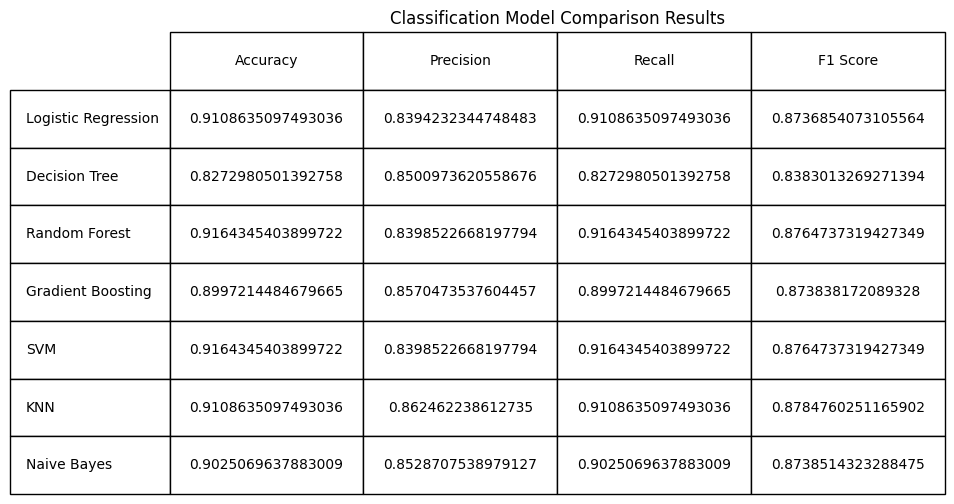

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the results dictionary
model_results = {
    'Logistic Regression': lr_results,
    'Decision Tree': dt_results,
    'Random Forest': rf_results,
    'Gradient Boosting': gb_results,
    'SVM': svm_results,
    'KNN': knn_results,
    'Naive Bayes': nb_results,
}

# Create a DataFrame to store all metrics for comparison
df_results = pd.DataFrame(model_results).T  # Transpose so that models are rows and metrics are columns

# Plot and save the results table as a figure
fig, ax = plt.subplots(figsize=(10, 6))  # Set the size of the figure
ax.axis('off')  # Hide the axes
table = ax.table(cellText=df_results.values,
                 rowLabels=df_results.index,
                 colLabels=df_results.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])
plt.title('Classification Model Comparison Results')
plt.savefig('Classification_comparison_results.jpg', format='jpg', bbox_inches='tight')
plt.show()


### 8. Regression Model Comparison


- **Linear Regression**
- **Decision Tree Regression**
- **Random Forest Regression**
- **Gradient Boosting Regression**
- **SVR (Support Vector Regression)**
- **KNN Regression**

### Performance Metrics

- **Mean Absolute Error (MAE)**
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **R^2 Score**



In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
print("Linear Regression Metrics")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
lin_reg_results = {
     "MSE": mean_squared_error(y_test, y_pred),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
     "MAE": mean_absolute_error(y_test, y_pred),
     "R2 Score": r2_score(y_test, y_pred),
}

Linear Regression Metrics
Mean Squared Error: 0.07420253097788843
Root Mean Squared Error: 0.2724014151539753
Mean Absolute Error: 0.14603260399857249
R^2 Score: 0.031074326751647452


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Metrics")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
dt_reg_results = {
     "MSE": mean_squared_error(y_test, y_pred),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
     "MAE": mean_absolute_error(y_test, y_pred),
     "R2 Score": r2_score(y_test, y_pred),
}



Decision Tree Regressor Metrics
Mean Squared Error: 0.16991643454038996
Root Mean Squared Error: 0.41220921210034833
Mean Absolute Error: 0.16991643454038996
R^2 Score: -1.2187436676798384


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
print("Random Forest Regressor Metrics")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
rf_reg_results = {
     "MSE": mean_squared_error(y_test, y_pred),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
     "MAE": mean_absolute_error(y_test, y_pred),
     "R2 Score": r2_score(y_test, y_pred),
}


Random Forest Regressor Metrics
Mean Squared Error: 0.07852841225626742
Root Mean Squared Error: 0.2802292137809108
Mean Absolute Error: 0.15412256267409472
R^2 Score: -0.025412391084093544


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(X_test)

# Evaluate the model
print("Gradient Boosting Regressor Metrics")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
gb_reg_results = {
     "MSE": mean_squared_error(y_test, y_pred),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
     "MAE": mean_absolute_error(y_test, y_pred),
     "R2 Score": r2_score(y_test, y_pred),
}


Gradient Boosting Regressor Metrics
Mean Squared Error: 0.07820174732341424
Root Mean Squared Error: 0.2796457532726257
Mean Absolute Error: 0.14887559010558343
R^2 Score: -0.021146848712153332


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [35]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Initialize and train the SVR model
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)

# Make predictions
y_pred_reg = svr_regressor.predict(X_test)

# Evaluate the model
print("SVR Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_reg, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_reg))
print("R^2 Score:", r2_score(y_test, y_pred_reg))
svr_reg_results = {
     "MSE": mean_squared_error(y_test, y_pred),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
     "MAE": mean_absolute_error(y_test, y_pred),
     "R2 Score": r2_score(y_test, y_pred),
}


SVR Regressor
Mean Squared Error: 0.0801689253317248
Root Mean Squared Error: 0.28314117562043994
Mean Absolute Error: 0.15532009859572635
R^2 Score: -0.04683396815380214


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Initialize and train the k-NN Regressor model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions
y_pred_reg = knn_regressor.predict(X_test)
knn_reg_results = {
     "MSE": mean_squared_error(y_test, y_pred),
     "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
     "MAE": mean_absolute_error(y_test, y_pred),
     "R2 Score": r2_score(y_test, y_pred),
}
# Evaluate the model
print("k-NN Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_reg))
print("Root Mean Squared Error:", mean_squared_error(y_test, y_pred_reg, squared=False))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_reg))
print("R^2 Score:", r2_score(y_test, y_pred_reg))


k-NN Regressor
Mean Squared Error: 0.0841225626740947
Root Mean Squared Error: 0.2900388985534435
Mean Absolute Error: 0.1331476323119777
R^2 Score: -0.0984599797365755


c:\Users\durup_d9ntfgd\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Dictionary to store results of all regression models
regression_results = {}

# Example: Suppose you have already stored results for each model in similar dictionaries
regression_results['Linear Regression'] = lin_reg_results
regression_results['Decision Tree'] = dt_reg_results
regression_results['Random Forest'] = rf_reg_results
regression_results['Gradient Boosting Regressor'] = gb_reg_results
regression_results['SVR'] = svr_reg_results
regression_results['KNN'] = knn_reg_results


# Example structure for storing regression results
# Determine the best model based on the lowest RMSE (or any other metric)
best_model = None
best_score = float('inf')

for model_name, metrics in regression_results.items():
    if metrics['RMSE'] < best_score:
        best_score = metrics['RMSE']
        best_model = model_name

# Output the best model and its corresponding metrics
print(f"The best regression model is: {best_model}")
print("Performance metrics:")
for metric_name, value in regression_results[best_model].items():
    print(f"{metric_name}: {value}")


The best regression model is: Linear Regression
Performance metrics:
MSE: 0.07420253097788843
RMSE: 0.2724014151539753
MAE: 0.14603260399857249
R2 Score: 0.031074326751647452


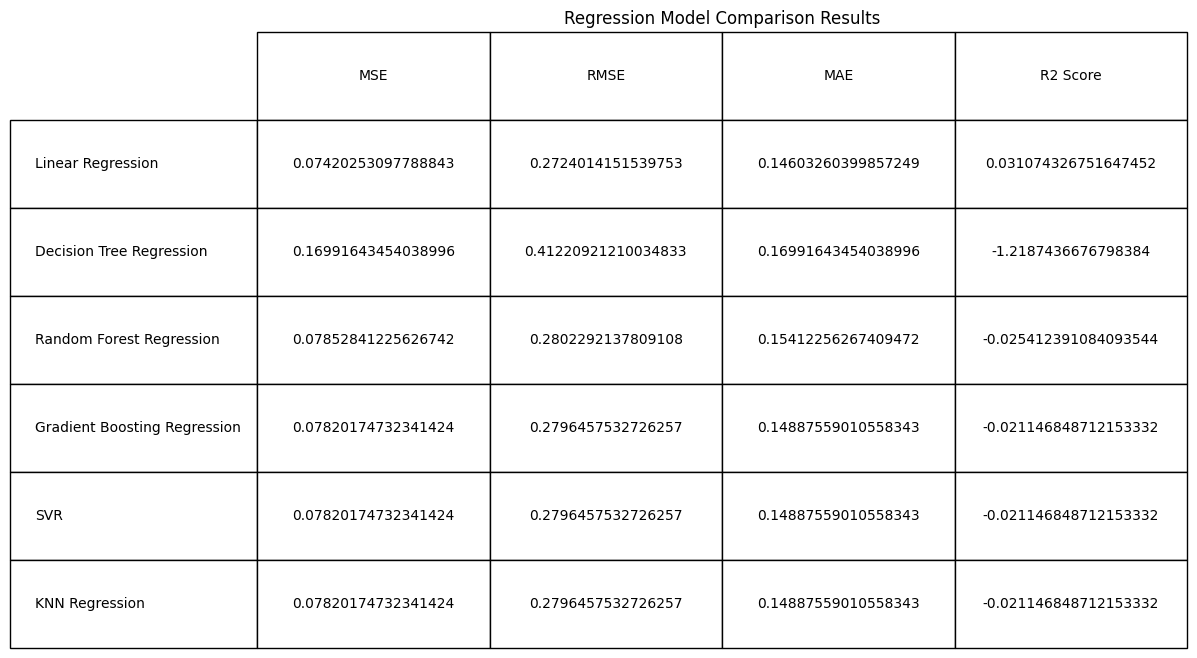

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have the results dictionary
model_results = {
    'Linear Regression': lin_reg_results,
    'Decision Tree Regression': dt_reg_results,
    'Random Forest Regression': rf_reg_results,
    'Gradient Boosting Regression': gb_reg_results,
    'SVR': svr_reg_results,
    'KNN Regression': knn_reg_results,
}

# Create a DataFrame to store all metrics for comparison
df_results = pd.DataFrame(model_results).T  # Transpose so that models are rows and metrics are columns

# Plot and save the results table as a figure
fig, ax = plt.subplots(figsize=(12, 8))  # Set the size of the figure
ax.axis('off')  # Hide the axes

# Create a table
table = ax.table(cellText=df_results.values,
                 rowLabels=df_results.index,
                 colLabels=df_results.columns,
                 cellLoc='center',
                 loc='center',
                 bbox=[0, 0, 1, 1])

# Set the title of the plot
plt.title('Regression Model Comparison Results')

# Save the plot as a JPG file
plt.savefig('Regression_Comparison_Results.jpg', format='jpg', bbox_inches='tight')

# Show the plot
plt.show()
